In [1]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
with ZipFile('digit-recognizer.zip','r') as zip_ref:
  zip_ref.extractall()

In [3]:
data = pd.read_csv('train.csv')

In [4]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data.shape

(42000, 785)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [7]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into validation and training sets

data_val = data[0:1000].T
Y_val = data_val[0]
X_val = data_val[1:n]
X_val = X_val / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.

In [8]:
Y_train.shape

(41000,)

In [ ]:
X_train.shape

(784, 41000)

In [11]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2


In [12]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [20]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 1000)

Iteration:  0
[5 5 5 ... 4 8 1] [2 0 7 ... 4 9 2]
0.05778048780487805
Iteration:  10
[5 0 8 ... 1 8 1] [2 0 7 ... 4 9 2]
0.1480731707317073
Iteration:  20
[5 0 8 ... 1 4 1] [2 0 7 ... 4 9 2]
0.22829268292682928
Iteration:  30
[5 0 8 ... 4 4 1] [2 0 7 ... 4 9 2]
0.28692682926829266
Iteration:  40
[5 0 8 ... 4 4 1] [2 0 7 ... 4 9 2]
0.33626829268292685
Iteration:  50
[2 0 8 ... 4 4 8] [2 0 7 ... 4 9 2]
0.3826341463414634
Iteration:  60
[2 0 9 ... 4 4 8] [2 0 7 ... 4 9 2]
0.4324878048780488
Iteration:  70
[2 0 9 ... 4 4 8] [2 0 7 ... 4 9 2]
0.47436585365853656
Iteration:  80
[2 0 9 ... 4 4 3] [2 0 7 ... 4 9 2]
0.5091707317073171
Iteration:  90
[2 0 9 ... 4 4 3] [2 0 7 ... 4 9 2]
0.5380975609756098
Iteration:  100
[2 0 9 ... 4 4 3] [2 0 7 ... 4 9 2]
0.5635853658536585
Iteration:  110
[2 0 9 ... 4 4 3] [2 0 7 ... 4 9 2]
0.5863414634146341
Iteration:  120
[2 0 9 ... 4 4 3] [2 0 7 ... 4 9 2]
0.6067317073170732
Iteration:  130
[2 0 9 ... 4 4 3] [2 0 7 ... 4 9 2]
0.622780487804878
Iteration:  1

In [21]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [2]
Label:  2


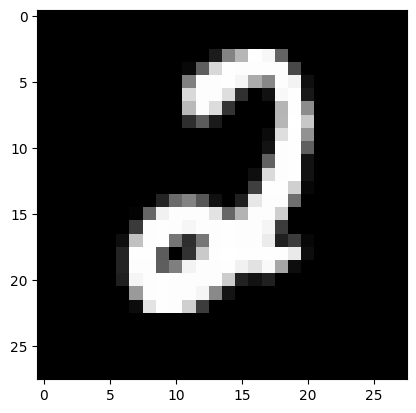

In [22]:
test_prediction(0, W1, b1, W2, b2)

Prediction:  [0]
Label:  0


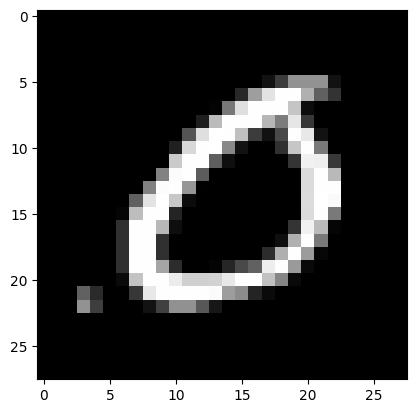

In [23]:
test_prediction(1, W1, b1, W2, b2)

Prediction:  [9]
Label:  7


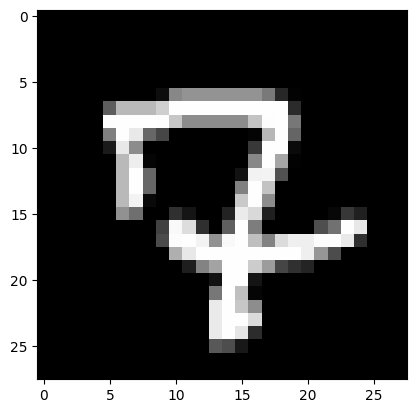

In [24]:
test_prediction(2, W1, b1, W2, b2)

Prediction:  [6]
Label:  6


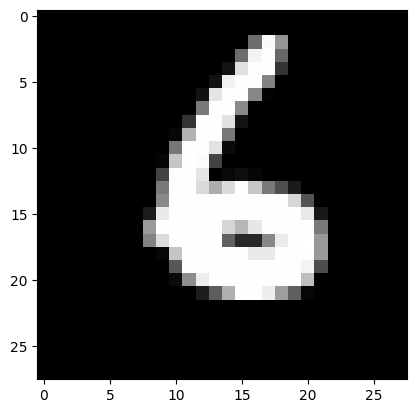

In [25]:
test_prediction(3, W1, b1, W2, b2)

In [27]:
val_predictions = make_predictions(X_val, W1, b1, W2, b2)
get_accuracy(val_predictions, Y_val)

[4 2 8 2 0 1 2 8 5 4 4 1 9 6 7 3 0 8 2 6 3 5 1 9 4 1 1 6 2 5 4 5 0 6 6 0 4
 4 3 6 7 1 8 3 4 5 4 3 0 9 3 4 8 8 4 9 8 0 3 6 1 3 8 8 4 7 6 8 9 7 8 4 2 2
 9 9 7 8 5 4 0 6 2 0 9 9 7 5 5 9 2 9 0 6 3 4 8 2 8 5 9 7 3 3 1 4 6 6 7 8 4
 5 9 2 1 2 1 7 8 1 6 8 8 5 7 5 8 6 5 9 0 8 6 3 9 6 0 1 8 3 3 4 1 3 7 6 6 6
 1 1 3 5 9 8 9 1 0 2 6 3 2 1 2 3 5 3 6 9 2 8 5 9 9 6 3 2 0 3 9 1 6 3 9 6 0
 2 0 0 1 1 2 3 8 3 2 7 7 3 8 1 3 2 2 1 9 6 6 3 5 4 1 6 9 6 4 4 9 6 1 2 0 5
 0 3 7 9 5 3 9 3 3 2 0 0 3 4 7 5 7 0 2 4 9 3 7 8 5 6 9 0 4 2 9 5 1 2 0 1 1
 8 3 0 3 7 9 0 5 0 4 6 7 7 9 1 4 5 2 4 4 8 6 1 6 7 6 6 8 5 1 2 6 5 0 5 5 1
 2 9 1 6 9 3 6 8 6 5 1 9 8 7 9 4 2 8 4 2 2 8 1 6 4 3 1 8 4 4 1 9 1 1 4 2 3
 6 2 1 1 5 6 6 5 0 5 7 5 5 1 0 9 2 7 9 5 4 6 7 3 5 4 5 5 0 1 5 6 8 4 0 5 7
 1 4 4 4 1 7 8 5 3 7 9 8 1 7 4 4 7 4 0 1 9 3 5 8 6 6 4 1 2 6 9 7 0 1 1 4 1
 0 4 8 2 4 7 2 9 2 1 7 7 8 9 2 0 3 3 8 4 4 7 4 0 3 5 4 9 2 3 3 8 1 4 7 2 9
 3 9 2 3 9 9 7 4 6 1 9 1 8 5 5 8 9 4 9 4 7 8 0 3 8 0 5 1 6 7 2 0 2 5 1 9 3
 6 9 5 1 8 5 7 1 2 3 8 1 

np.float64(0.877)